In [1]:
import numpy as np
import pandas as pd

three modules
- `datetime`
- `time`
- `calendar`

# `datetime`

In [13]:
from datetime import datetime
now = datetime.now()
print(now)
print(now.year, now.month, now.day)

2022-07-22 21:08:13.795270
2022 7 22


`timedelta` represents temporal difference

In [20]:
delta = datetime(2011, 1, 7) - datetime(2008, 6, 24, 8, 15)
delta

datetime.timedelta(days=926, seconds=56700)

In [21]:
delta.days

926

In [22]:
delta.seconds

56700

In [23]:
from datetime import timedelta
start = datetime(2011, 1, 7)
delta = timedelta(12) # add 12 days
start + delta

datetime.datetime(2011, 1, 19, 0, 0)

In [24]:
start - 2 * delta

datetime.datetime(2010, 12, 14, 0, 0)

- `date` stores date(year, month,day) using Georgian calendar
- `time` stores time of day(hrs, mins, secs, microsecs)
- `datetime` stores both date and time
- `timedelta` difference between two datetime objects as (days, seconds, microsecs)
- `tzinfo` base type for storing time zone info 

converting between string and datetime
using `str` or `strftime`

In [34]:
stamp = datetime(2011, 1, 3, 23)
str(stamp)


'2011-01-03 23:00:00'

In [44]:
stamp.strftime("%Y-%m-%d-%I-%S-%f-%Z")

'2011-01-03-11-00-000000-'

In [46]:
# convert string to datetime
value = "2011-01-03"
datetime.strptime(value, "%Y-%m-%d")

datetime.datetime(2011, 1, 3, 0, 0)

`pandas` datetime

In [50]:
datestrs = ["2011-07-06 12:00:00", "2011-08-06 00:00:00"]
pd.to_datetime(datestrs)


DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00'], dtype='datetime64[ns]', freq=None)

In [53]:
idx = pd.to_datetime(datestrs + [None])
idx

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00', 'NaT', 'NaT',
               'NaT'],
              dtype='datetime64[ns]', freq=None)

In [56]:
datestrs.append(None)
pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00', 'NaT', 'NaT',
               'NaT', 'NaT'],
              dtype='datetime64[ns]', freq=None)

`NaT` is not a time

In [57]:
pd.isna(idx)

array([False, False,  True,  True,  True])

# Pandas TimeSeries Basics

In [58]:
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5),
         datetime(2011, 1, 7), datetime(2011, 1, 8),
         datetime(2011, 1, 10), datetime(2011, 1, 12)]
ts = pd.Series(np.random.standard_normal(len(dates)), index=dates)
ts

2011-01-02    1.091964
2011-01-05    0.365038
2011-01-07    1.440131
2011-01-08   -0.429243
2011-01-10    0.108160
2011-01-12   -0.636599
dtype: float64

operations on time indexed dataframes aligns on dates

In [60]:
ts + ts[::2] # adds every other value with itself

2011-01-02    2.183928
2011-01-05         NaN
2011-01-07    2.880262
2011-01-08         NaN
2011-01-10    0.216321
2011-01-12         NaN
dtype: float64

In [62]:
ts.index.dtype # stored as numpy's datetime64 at nanoseconds resolution

dtype('<M8[ns]')

`pandas.Timestamp` can be substituted for `datetime` but *may* not the other way around
- Timestamp stores at nanosecond resolution whereas datetime is microseconds
- Timestamp can handle timezone conversions and store frequency information

In [63]:
ts.index[0]

Timestamp('2011-01-02 00:00:00')

Indexing

In [64]:
ts["2011-01-05"]

0.365038271379911

In [67]:
stamp = ts.index[2]
ts.loc[stamp]
ts[stamp]

1.4401309360428818

 default `freq` is days `D` in `date_range`, periods are generated based on frequency

In [71]:
longer_ts = pd.Series(np.random.standard_normal(1000),
                     index=pd.date_range("2000-01-01-09", periods=1000))
                     
longer_ts                

2000-01-01 09:00:00    0.196652
2000-01-02 09:00:00   -0.978825
2000-01-03 09:00:00   -0.227206
2000-01-04 09:00:00    0.078074
2000-01-05 09:00:00    0.450239
                         ...   
2002-09-22 09:00:00    0.635619
2002-09-23 09:00:00   -0.305815
2002-09-24 09:00:00    1.369600
2002-09-25 09:00:00   -1.954314
2002-09-26 09:00:00    0.111125
Freq: D, Length: 1000, dtype: float64

In [72]:
# subset by year
longer_ts["2001"]

2001-01-01 09:00:00    2.751242
2001-01-02 09:00:00   -2.179290
2001-01-03 09:00:00   -0.146192
2001-01-04 09:00:00   -0.055184
2001-01-05 09:00:00   -0.582200
                         ...   
2001-12-27 09:00:00    0.220069
2001-12-28 09:00:00    0.256989
2001-12-29 09:00:00   -1.219508
2001-12-30 09:00:00    1.027289
2001-12-31 09:00:00    1.148620
Freq: D, Length: 365, dtype: float64

In [73]:
# subset by month
longer_ts["2001-05"]

2001-05-01 09:00:00   -0.863711
2001-05-02 09:00:00   -0.911403
2001-05-03 09:00:00   -0.451811
2001-05-04 09:00:00    0.705887
2001-05-05 09:00:00    0.325411
2001-05-06 09:00:00    0.893961
2001-05-07 09:00:00    1.360390
2001-05-08 09:00:00    0.458763
2001-05-09 09:00:00   -0.039651
2001-05-10 09:00:00    0.007843
2001-05-11 09:00:00    1.271037
2001-05-12 09:00:00   -0.893327
2001-05-13 09:00:00    0.515144
2001-05-14 09:00:00   -0.084740
2001-05-15 09:00:00   -0.173309
2001-05-16 09:00:00   -0.802105
2001-05-17 09:00:00   -0.215242
2001-05-18 09:00:00    0.148674
2001-05-19 09:00:00   -0.894670
2001-05-20 09:00:00   -1.493811
2001-05-21 09:00:00    0.504539
2001-05-22 09:00:00   -0.671674
2001-05-23 09:00:00    1.371451
2001-05-24 09:00:00   -0.255703
2001-05-25 09:00:00    0.356486
2001-05-26 09:00:00   -0.290510
2001-05-27 09:00:00   -2.227703
2001-05-28 09:00:00   -0.946760
2001-05-29 09:00:00    0.194913
2001-05-30 09:00:00   -0.952172
2001-05-31 09:00:00    1.036555
Freq: D,

Slicing with `datetime` objects

In [74]:
ts[datetime(2011,1,7):datetime(2011,1,10)]

2011-01-07    1.440131
2011-01-08   -0.429243
2011-01-10    0.108160
dtype: float64

In [78]:
longer_ts[datetime(2001, 5, 25):datetime(2001, 5, 30)]

2001-05-25 09:00:00    0.356486
2001-05-26 09:00:00   -0.290510
2001-05-27 09:00:00   -2.227703
2001-05-28 09:00:00   -0.946760
2001-05-29 09:00:00    0.194913
Freq: D, dtype: float64

In [77]:
longer_ts.index[0]

Timestamp('2000-01-01 09:00:00', freq='D')

In [79]:
longer_ts["2001-05-25":"2001-05-30"]

2001-05-25 09:00:00    0.356486
2001-05-26 09:00:00   -0.290510
2001-05-27 09:00:00   -2.227703
2001-05-28 09:00:00   -0.946760
2001-05-29 09:00:00    0.194913
2001-05-30 09:00:00   -0.952172
Freq: D, dtype: float64

**NOTE** slicing produces views not copies, changes will reflected in original data

`truncate` to slice series

In [80]:
longer_ts.truncate(after="2001-05-30")

2000-01-01 09:00:00    0.196652
2000-01-02 09:00:00   -0.978825
2000-01-03 09:00:00   -0.227206
2000-01-04 09:00:00    0.078074
2000-01-05 09:00:00    0.450239
                         ...   
2001-05-25 09:00:00    0.356486
2001-05-26 09:00:00   -0.290510
2001-05-27 09:00:00   -2.227703
2001-05-28 09:00:00   -0.946760
2001-05-29 09:00:00    0.194913
Freq: D, Length: 515, dtype: float64

In [84]:
dates = pd.date_range("2000-03-11", periods=30, freq="W-WED") # weekly wednesday freq
long_df = pd.DataFrame(np.random.standard_normal((30, 4)),
    index=dates,
    columns=["Colorado", "Texas", "New York", "Ohio"])

In [88]:
long_df.loc["2000-04-12"]

Colorado    1.248780
Texas      -0.657757
New York    0.078938
Ohio        0.006289
Name: 2000-04-12 00:00:00, dtype: float64

Duplicate indices

In [89]:
dates = pd.DatetimeIndex(["2000-01-01", "2000-01-02", "2000-01-02",
    "2000-01-02", "2000-01-03"])
dup_ts = pd.Series(np.random.standard_normal(dates.shape[0]), index=dates)    
dup_ts


2000-01-01   -0.748545
2000-01-02    1.721871
2000-01-02   -1.342584
2000-01-02   -0.154013
2000-01-03   -0.517951
dtype: float64

In [90]:
dup_ts.index.is_unique

False

In [91]:
dup_ts["2000-01-02"]

2000-01-02    1.721871
2000-01-02   -1.342584
2000-01-02   -0.154013
dtype: float64

In [93]:
grouped = dup_ts.groupby(level=0) # use grouping by levels to group on duplicate timestamps
grouped.mean()

2000-01-01   -0.748545
2000-01-02    0.075091
2000-01-03   -0.517951
dtype: float64

# Date Ranges in depth

In [95]:
index = pd.date_range("2012-04-01", "2012-06-02")
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

In [96]:
pd.date_range("2012-04-01", periods=60)

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

In [98]:
pd.date_range("2012-04-01", periods=4, freq="BM") # last business day of each month for next 4 months


DatetimeIndex(['2012-04-30', '2012-05-31', '2012-06-29', '2012-07-31'], dtype='datetime64[ns]', freq='BM')

In [100]:

pd.date_range("2012-04-01", periods=4, freq="B") # last business day of each month for next 4 months

DatetimeIndex(['2012-04-02', '2012-04-03', '2012-04-04', '2012-04-05'], dtype='datetime64[ns]', freq='B')

In [101]:
# time stamp of any start or end date preserved
pd.date_range("2012-04-01 12:54:30", periods=4)

DatetimeIndex(['2012-04-01 12:54:30', '2012-04-02 12:54:30',
               '2012-04-03 12:54:30', '2012-04-04 12:54:30'],
              dtype='datetime64[ns]', freq='D')

Frequencies

composed of base frequency and a multiplier

In [103]:
from pandas.tseries.offsets import Hour, Minute
hour = Hour()
hour

<Hour>

In [104]:
Hour(4)

<4 * Hours>

In [105]:
pd.date_range("2000-01-03", periods=10, freq="4H")

DatetimeIndex(['2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00',
               '2000-01-04 00:00:00', '2000-01-04 04:00:00',
               '2000-01-04 08:00:00', '2000-01-04 12:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [106]:
Hour(2) + Minute(30)

<150 * Minutes>

In [108]:

pd.date_range("2012-04-01", periods=10,  freq="1H30min") # last business day of each month for next 4 months

DatetimeIndex(['2012-04-01 00:00:00', '2012-04-01 01:30:00',
               '2012-04-01 03:00:00', '2012-04-01 04:30:00',
               '2012-04-01 06:00:00', '2012-04-01 07:30:00',
               '2012-04-01 09:00:00', '2012-04-01 10:30:00',
               '2012-04-01 12:00:00', '2012-04-01 13:30:00'],
              dtype='datetime64[ns]', freq='90T')

In [109]:
# week of month - third friday of every month
pd.date_range("2004-03-02", periods=5, freq="WOM-3FRI")

DatetimeIndex(['2004-03-19', '2004-04-16', '2004-05-21', '2004-06-18',
               '2004-07-16'],
              dtype='datetime64[ns]', freq='WOM-3FRI')

## Shifting(leading and lagging) data
- move data forward and backward through time

In [111]:
ts = pd.Series(np.random.standard_normal(4), 
    index=pd.date_range("2000-04-01", periods=4, freq="M"))
ts    

2000-04-30    0.202784
2000-05-31   -0.639967
2000-06-30    0.054576
2000-07-31    2.053081
Freq: M, dtype: float64

In [112]:
ts.shift(2)

2000-04-30         NaN
2000-05-31         NaN
2000-06-30    0.202784
2000-07-31   -0.639967
Freq: M, dtype: float64

In [113]:
ts.shift(-2)

2000-04-30    0.054576
2000-05-31    2.053081
2000-06-30         NaN
2000-07-31         NaN
Freq: M, dtype: float64

### usecase: compute percent chanege in consecutive times

In [118]:
(ts - ts.shift(1))/abs(ts.shift(1))

2000-04-30          NaN
2000-05-31    -4.155909
2000-06-30     1.085280
2000-07-31    36.618533
Freq: M, dtype: float64

In [121]:
ts.shift(2, freq="M") # to advance index instead of data

2000-06-30    0.202784
2000-07-31   -0.639967
2000-08-31    0.054576
2000-09-30    2.053081
Freq: M, dtype: float64

In [124]:
# freq is the offset added, 
# it doesn't change the underlying frequency of data
ts.shift(3, freq="D") 

2000-05-03    0.202784
2000-06-03   -0.639967
2000-07-03    0.054576
2000-08-03    2.053081
dtype: float64

In [127]:
ts.shift(1, freq="30T")

2000-04-30 00:30:00    0.202784
2000-05-31 00:30:00   -0.639967
2000-06-30 00:30:00    0.054576
2000-07-31 00:30:00    2.053081
dtype: float64

offsets from `tseries.offsets`
- added to `datetime` or `Timestamp` objects

In [132]:
from pandas.tseries.offsets import Day, MonthEnd

now = datetime(2011, 11, 17)

now +  Day(3)

Timestamp('2011-11-20 00:00:00')

adding anchored offsets like MonthEnd, the first increment will "roll forward" a date according to frequency rule

In [129]:
now + MonthEnd()

Timestamp('2011-11-30 00:00:00')

In [130]:
now + MonthEnd(2)

Timestamp('2011-12-31 00:00:00')

In [133]:
offset = MonthEnd()
offset.rollforward(now)

Timestamp('2011-11-30 00:00:00')

In [134]:
offset.rollback(now)

Timestamp('2011-10-31 00:00:00')

### usecase: `groupby` with offsets

In [137]:
ts = pd.Series(np.random.standard_normal(20),
    index=pd.date_range("2000-05-01", periods=20, freq="4D"))
ts

2000-05-01   -0.466056
2000-05-05    0.891636
2000-05-09    0.778531
2000-05-13   -0.723219
2000-05-17    1.328988
2000-05-21    0.591037
2000-05-25    1.846923
2000-05-29   -0.807854
2000-06-02   -1.952050
2000-06-06    0.089391
2000-06-10    0.473320
2000-06-14   -0.406710
2000-06-18    1.664654
2000-06-22    1.449469
2000-06-26   -0.306600
2000-06-30   -0.157319
2000-07-04   -0.605685
2000-07-08   -1.738512
2000-07-12   -1.147497
2000-07-16    0.034897
Freq: 4D, dtype: float64

In [140]:
ts.groupby(MonthEnd().rollforward).mean() # monthly means

2000-05-31    0.429998
2000-06-30    0.106769
2000-07-31   -0.864199
dtype: float64

In [141]:
# easier way to use resample
ts.resample("M").mean()

2000-05-31    0.429998
2000-06-30    0.106769
2000-07-31   -0.864199
Freq: M, dtype: float64

# Periods
periods provide a way to represent a chunk of time in a single unit as opposed to timestamp, whereas date range is timestamp based

In [49]:
p = pd.Period("2011", freq="A-DEC")
p

Period('2011', 'A-DEC')

In [50]:
p + 2

Period('2013', 'A-DEC')

In [62]:
p1 = pd.Period("2012", freq="2Q") # period is anchored on the frequency


In [63]:
print(p1.year, p1.month, p1.quarter, p1.day, p1.hour, p1.minute)

2012 3 1 31 0 0


In [64]:
print(p1.start_time, p1.end_time)

2012-01-01 00:00:00 2012-06-30 23:59:59.999999999


In [66]:
# subtracct two periods with same frequency
p2 = pd.Period("2012-07", freq="2Q")
p2 - p1

<2 * QuarterEnds: startingMonth=12>

## ranges of periods

In [67]:
periods = pd.period_range("2000-01-01", "2000-06-30", freq="M")
periods

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]')

In [72]:
# use as index
pd.Series(np.random.standard_normal(periods.shape[0]), index=periods)


2000-01   -1.556001
2000-02    0.940614
2000-03    0.469065
2000-04   -1.907890
2000-05   -0.101232
2000-06   -1.087176
Freq: M, dtype: float64

In [73]:
values = ["2001Q1", "2002Q2", "2003Q1"]
index = pd.PeriodIndex(values, freq="Q-DEC")
index

PeriodIndex(['2001Q1', '2002Q2', '2003Q1'], dtype='period[Q-DEC]')

In [74]:
pd.PeriodIndex(periods)

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]')

frequency conversion

In [76]:
# convert annual period to monthly period at start of year
p = pd.Period("2001", freq="A-DEC")
p.asfreq("M", how="start")

Period('2001-01', 'M')

In [78]:
p.asfreq("M", how="end")

Period('2001-12', 'M')

In [105]:
# converting PeriodIndex or time series objects
periods = pd.period_range("2009", "2011", freq="A-DEC")
ts = pd.Series(np.random.standard_normal(periods.shape[0]), index=periods)
ts

2009    0.734562
2010    1.209846
2011   -0.745344
Freq: A-DEC, dtype: float64

In [106]:
ts = ts.asfreq("Q", how='start')
ts

2009Q1    0.734562
2010Q1    1.209846
2011Q1   -0.745344
Freq: Q-DEC, dtype: float64

In [107]:
print(ts.index[0].start_time, ts.index[0].end_time)

2009-01-01 00:00:00 2009-03-31 23:59:59.999999999


In [109]:
ts.asfreq("B", how="start") # first business day of each quarter

2009-01-01    0.734562
2010-01-01    1.209846
2011-01-03   -0.745344
Freq: B, dtype: float64

## converting betwen periods and timestamps

In [111]:
dates = pd.date_range("2000-01-01", periods=3, freq="M")

ts = pd.Series(np.random.standard_normal(3), index=dates)
ts

2000-01-31   -2.369816
2000-02-29   -2.022267
2000-03-31    0.418788
Freq: M, dtype: float64

In [116]:
ts.to_period()

2000-01   -2.369816
2000-02   -2.022267
2000-03    0.418788
Freq: M, dtype: float64

In [115]:
ts.to_period(freq="Q")

2000Q1   -2.369816
2000Q1   -2.022267
2000Q1    0.418788
Freq: Q-DEC, dtype: float64

In [120]:
dates = pd.date_range("2000-01-01", periods=10, freq="10D")

ts = pd.Series(np.random.standard_normal(10), index=dates)
ts

2000-01-01    2.521003
2000-01-11    0.514052
2000-01-21   -1.166886
2000-01-31   -0.940155
2000-02-10   -1.501184
2000-02-20    0.213208
2000-03-01    0.350837
2000-03-11   -0.547629
2000-03-21   -0.858364
2000-03-31   -1.345464
Freq: 10D, dtype: float64

In [121]:
ts.to_period("M")

2000-01    2.521003
2000-01    0.514052
2000-01   -1.166886
2000-01   -0.940155
2000-02   -1.501184
2000-02    0.213208
2000-03    0.350837
2000-03   -0.547629
2000-03   -0.858364
2000-03   -1.345464
Freq: M, dtype: float64

In [126]:
pts = ts.to_period("M")
pts.to_timestamp(how="end")

2000-01-31 23:59:59.999999999    2.521003
2000-01-31 23:59:59.999999999    0.514052
2000-01-31 23:59:59.999999999   -1.166886
2000-01-31 23:59:59.999999999   -0.940155
2000-02-29 23:59:59.999999999   -1.501184
2000-02-29 23:59:59.999999999    0.213208
2000-03-31 23:59:59.999999999    0.350837
2000-03-31 23:59:59.999999999   -0.547629
2000-03-31 23:59:59.999999999   -0.858364
2000-03-31 23:59:59.999999999   -1.345464
dtype: float64

PeriodIndex from Arrays

In [156]:
data = pd.read_csv("examples/macrodata.csv")
data["year"] = data["year"].astype("str")
data["year"] = data["year"].str.split(".", expand=True)[0]
data["quarter"] = data["quarter"].astype("str")
data["quarter"] = data["quarter"].str.split(".", expand=True)[0]
data.head()


,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [157]:
periods = data["year"] + "Q" + data["quarter"]
data.set_index(pd.PeriodIndex(periods, freq="Q"))

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959Q1,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1959Q2,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
1959Q3,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
1959Q4,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
1960Q1,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008Q3,2008,3,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
2008Q4,2008,4,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
2009Q1,2009,1,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
2009Q2,2009,2,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19


In [159]:

data = pd.read_csv("examples/macrodata.csv")
index = pd.PeriodIndex(year=data["year"], quarter=data["quarter"],
freq="Q")
index

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203)

# Resampling and Frequency Conversion
- converting timeseries from one frequency to another
- higher frequency to lower is downsampling
- lower to higher is upsampling
- `resampling` is the workhorse

## Downsampling

In [181]:
# downsampling
dates = pd.date_range("2001-01", periods=10, freq="M")
ts = pd.Series(np.random.standard_normal(10), index=dates)
ts

2001-01-31    0.007371
2001-02-28   -1.003143
2001-03-31   -0.116835
2001-04-30   -0.356760
2001-05-31    0.645051
2001-06-30   -0.468141
2001-07-31   -0.612836
2001-08-31   -0.322689
2001-09-30   -0.054880
2001-10-31   -0.428436
Freq: M, dtype: float64

In [182]:
ts.resample("Q").mean()

2001-03-31   -0.370869
2001-06-30   -0.059950
2001-09-30   -0.330135
2001-12-31   -0.428436
Freq: Q-DEC, dtype: float64

In [193]:

ts1 = ts.resample("Q", closed="right", label="right").mean()
ts1

2001-03-31   -0.370869
2001-06-30   -0.059950
2001-09-30   -0.330135
2001-12-31   -0.428436
Freq: Q-DEC, dtype: float64

In [194]:
ts1.to_period("Q")

2001Q1   -0.370869
2001Q2   -0.059950
2001Q3   -0.330135
2001Q4   -0.428436
Freq: Q-DEC, dtype: float64

## upsampling

In [195]:
frame = pd.DataFrame(np.random.standard_normal((2,4)),
    index=pd.date_range("2000-01-01", periods=2, freq="W-WED"),
    columns=["Colorado", "Texas", "NY", "Ohio"])
frame

,Colorado,Texas,NY,Ohio
2000-01-05,1.914644,-0.699376,-1.832374,-1.043506
2000-01-12,-0.455460,0.749876,-0.302269,-0.166140


In [198]:
frame.resample("D").asfreq() # asfreq to convert without aggregation

,Colorado,Texas,NY,Ohio
2000-01-05,1.914644,-0.699376,-1.832374,-1.043506
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,-0.455460,0.749876,-0.302269,-0.166140


In [199]:
frame.resample("D").ffill()

,Colorado,Texas,NY,Ohio
2000-01-05,1.914644,-0.699376,-1.832374,-1.043506
2000-01-06,1.914644,-0.699376,-1.832374,-1.043506
2000-01-07,1.914644,-0.699376,-1.832374,-1.043506
2000-01-08,1.914644,-0.699376,-1.832374,-1.043506
2000-01-09,1.914644,-0.699376,-1.832374,-1.043506
2000-01-10,1.914644,-0.699376,-1.832374,-1.043506
2000-01-11,1.914644,-0.699376,-1.832374,-1.043506
2000-01-12,-0.455460,0.749876,-0.302269,-0.166140


In [202]:
frame.resample("W-THU").bfill()

,Colorado,Texas,NY,Ohio
2000-01-06,-0.45546,0.749876,-0.302269,-0.16614
2000-01-13,NaN,NaN,NaN,NaN


# Resampling with Periods

In [208]:
frame = pd.DataFrame(np.random.standard_normal((24,4)),
    index=pd.period_range("2000-01-01", "2001-12", freq="M"),
    columns=["Colorado", "Texas", "NY", "Ohio"])
frame.head()

,Colorado,Texas,NY,Ohio
2000-01,-1.618552,-0.454613,2.669326,1.488964
2000-02,1.418313,-0.969263,-0.630067,-0.458414
2000-03,-0.542985,0.822748,-0.158037,1.689455
2000-04,0.349359,-1.749208,-0.271977,-0.968584
2000-05,1.808858,0.068203,0.380817,-1.427350


In [211]:
annual = frame.resample("A-DEC").mean()

In [212]:
# upsample
annual.resample("Q-DEC").asfreq()

,Colorado,Texas,NY,Ohio
2000Q1,0.061130,-0.376693,0.600345,0.324611
2000Q2,NaN,NaN,NaN,NaN
2000Q3,NaN,NaN,NaN,NaN
2000Q4,NaN,NaN,NaN,NaN
2001Q1,-0.061793,0.222338,0.276042,0.333843
2001Q2,NaN,NaN,NaN,NaN
2001Q3,NaN,NaN,NaN,NaN
2001Q4,NaN,NaN,NaN,NaN


In [213]:
annual.resample("Q-DEC").ffill()


,Colorado,Texas,NY,Ohio
2000Q1,0.061130,-0.376693,0.600345,0.324611
2000Q2,0.061130,-0.376693,0.600345,0.324611
2000Q3,0.061130,-0.376693,0.600345,0.324611
2000Q4,0.061130,-0.376693,0.600345,0.324611
2001Q1,-0.061793,0.222338,0.276042,0.333843
2001Q2,-0.061793,0.222338,0.276042,0.333843
2001Q3,-0.061793,0.222338,0.276042,0.333843
2001Q4,-0.061793,0.222338,0.276042,0.333843


In [214]:
annual.resample("Q-MAR").asfreq()

,Colorado,Texas,NY,Ohio
2000Q4,0.061130,-0.376693,0.600345,0.324611
2001Q1,NaN,NaN,NaN,NaN
2001Q2,NaN,NaN,NaN,NaN
2001Q3,NaN,NaN,NaN,NaN
2001Q4,-0.061793,0.222338,0.276042,0.333843
2002Q1,NaN,NaN,NaN,NaN
2002Q2,NaN,NaN,NaN,NaN
2002Q3,NaN,NaN,NaN,NaN


In [215]:
annual

,Colorado,Texas,NY,Ohio
2000,0.061130,-0.376693,0.600345,0.324611
2001,-0.061793,0.222338,0.276042,0.333843


## Grouped Time resampling
`pd.Grouper` to group multiple timeseries which are indicated by a key in the data

In [219]:
N=15
times = pd.date_range("2017-05-20 00:00", freq="1min", periods=N)
df2 = pd.DataFrame({"time": times.repeat(3),
    "key": np.tile(["a", "b", "c"], N),
    "value": np.arange(N * 3.)})
df2.head(10)

,time,key,value
0,2017-05-20 00:00:00,a,0.0
1,2017-05-20 00:00:00,b,1.0
2,2017-05-20 00:00:00,c,2.0
3,2017-05-20 00:01:00,a,3.0
4,2017-05-20 00:01:00,b,4.0
5,2017-05-20 00:01:00,c,5.0
6,2017-05-20 00:02:00,a,6.0
7,2017-05-20 00:02:00,b,7.0
8,2017-05-20 00:02:00,c,8.0
9,2017-05-20 00:03:00,a,9.0


In [221]:
ts_grouper = pd.Grouper(freq="5min")
df2.set_index("time").groupby(["key", ts_grouper]).sum()

# Moving window functions
- compute stats or other other functions 
    - over a sliding window
    - exponentially decaying weights
- useful for smoothing noisy or gappy data
- exponentially weighted moving average is without fixed-length window

In [268]:
close_px_all = pd.read_csv("examples/stock_px_2.csv",
    parse_dates=True, infer_datetime_format=True, index_col=0)

In [269]:
close_px_all.head(10)

,AAPL,MSFT,XOM,SPX
2003-01-02,7.40,21.11,29.22,909.03
2003-01-03,7.45,21.14,29.24,908.59
2003-01-06,7.45,21.52,29.96,929.01
2003-01-07,7.43,21.93,28.95,922.93
2003-01-08,7.28,21.31,28.83,909.93
2003-01-09,7.34,21.93,29.44,927.57
2003-01-10,7.36,21.97,29.03,927.57
2003-01-13,7.32,22.16,28.91,926.26
2003-01-14,7.30,22.39,29.17,931.66
2003-01-15,7.22,22.11,28.77,918.22


In [270]:
close_px = close_px_all[["AAPL", "MSFT", "XOM"]]
close_px = close_px.resample("B").ffill()
close_px.head(10)

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83
2003-01-09,7.34,21.93,29.44
2003-01-10,7.36,21.97,29.03
2003-01-13,7.32,22.16,28.91
2003-01-14,7.30,22.39,29.17
2003-01-15,7.22,22.11,28.77


In [271]:
close_px.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2292 entries, 2003-01-02 to 2011-10-14
Freq: B
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    2292 non-null   float64
 1   MSFT    2292 non-null   float64
 2   XOM     2292 non-null   float64
dtypes: float64(3)
memory usage: 71.6 KB


rolling operator
- behaves similar to resample and groupby

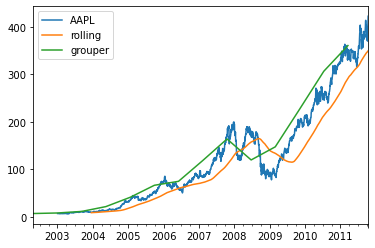

In [272]:
from matplotlib import pyplot as plt
close_px["AAPL"].plot()
close_px.rolling(250).mean()["AAPL"].plot(label="rolling") # 250 day rolling window

group250 = pd.Grouper(freq="250D", origin="start", closed="right")
close_px.groupby(group250)["AAPL"].mean().plot(label="grouper")
plt.legend()

<AxesSubplot:>

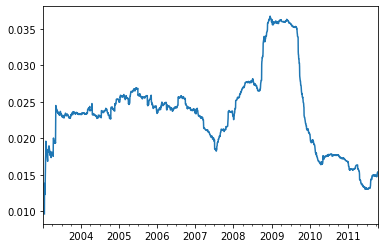

In [276]:
# how much change occured daily in a 250D time period
pct_change = close_px["AAPL"].pct_change()
#how fast the stock market is changing
pct_change.rolling(250, min_periods=10).std().plot()

expanding window mean

<AxesSubplot:>

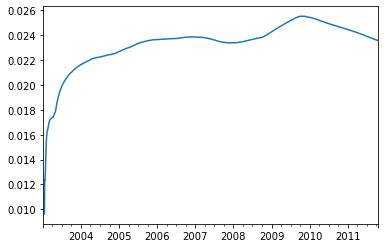

In [277]:
std250 = pct_change.rolling(250, min_periods=10).std()
std250.expanding().mean().plot()

exponentially weighted functions
- give more weight to more recent observations
- using constant decay factor
- `ewm` operator to go along with `rolling` and `expanding`

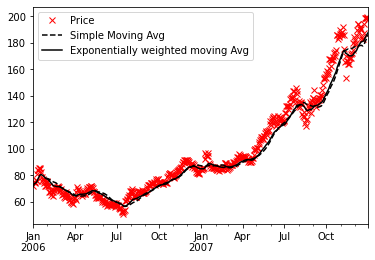

In [279]:
aapl_px = close_px["AAPL"]["2006":"2007"]
ma30 = aapl_px.rolling(30, min_periods=20).mean()
ewma30 = aapl_px.ewm(span=30).mean()

aapl_px.plot(style="rx", label="Price")
ma30.plot(style="k--", label="Simple Moving Avg")
ewma30.plot(style="k-", label="Exponentially weighted moving Avg")
plt.legend()

<AxesSubplot:>

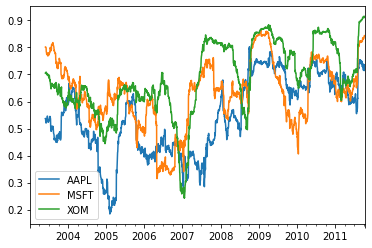

In [282]:
spx_rets = close_px_all["SPX"].pct_change()
returns = close_px.pct_change()
returns.rolling(125, min_periods=100).corr(spx_rets).plot()

user definned moving window functions

90.0087260034904


<AxesSubplot:>

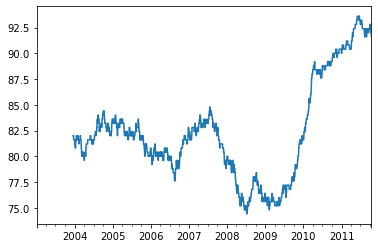

In [295]:
from scipy.stats import percentileofscore

# custom function should always return a scalar
def score_at_percent(x, *, v=0.01):
    return percentileofscore(x, v)

returns.rolling(250).apply(score_at_percent, kwargs={'v':0.02})["AAPL"].plot()